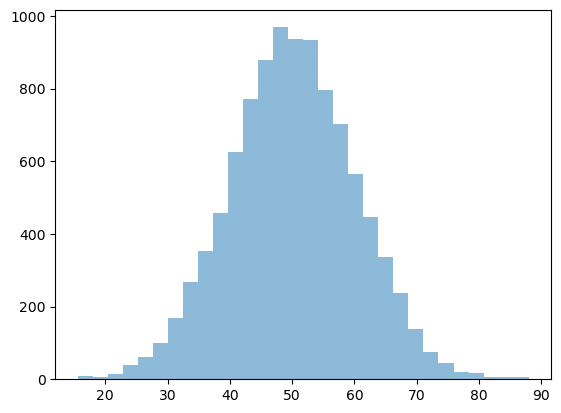

,0
0,58.301107
1,36.488278
2,52.297703
3,49.222612
4,44.224778


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""데이터 구성, 일일노출량은 각 연령대로 나와있는 데이터에 기반해서 계산을 할 것이다. 
나머지 연령대별로 데이터 프레임 구성, 편차 계산해서 각자 연령대별로 데이터 구성 -> 가우시안 프로세스에 기반하여 진행.
연령대별 데이터는 현재 인구 분포를 따를 것, 
groupby로 묶어서 각 연령대별 과불화화합물 축정량 계산, 데이터 시각화"""

#평균과 분산을 통해 임의의 데이터 프레임을 만드는 법 (하나의 columns를 만들 수 있다.)
mean = 50
std = 10

data = np.random.normal(loc = mean, scale = std, size = 10000)

plt.hist(data, bins=30, alpha=0.5, label= ' mean=50, std = 10')
plt.show()
concentration = pd.DataFrame(data)
concentration.head()

In [3]:
# 판단모델 만들기

# 인체 바이오 모니터링 상황을 최소, 시나리오 활용 상황을 최대로 해서 

LADD =  concentration * 1.2 / (64.2)

PFOA_TWI = 2.9 #일일 노출량 단위는 ng/kg bw/day
PFOS_TWI = 5.7

print(LADD)

# 유해지수 HI를 구한 것이다. 특정 물질이나 환경 요인에 노출되었을 때 인체 건강에 미칠 수 있는 위험 정도를 수치화한 지표이다. 

PFOA_HI = LADD / PFOA_TWI
PFOS_HI = LADD / PFOS_TWI

print(PFOA_HI)
print(PFOS_HI)

             0
0     1.089740
1     0.682024
2     0.977527
3     0.920049
4     0.826631
...        ...
9995  1.172232
9996  1.008777
9997  0.714806
9998  0.781064
9999  0.942264

[10000 rows x 1 columns]
             0
0     0.375773
1     0.235181
2     0.337078
3     0.317258
4     0.285045
...        ...
9995  0.404218
9996  0.347854
9997  0.246485
9998  0.269333
9999  0.324919

[10000 rows x 1 columns]
             0
0     0.191183
1     0.119653
2     0.171496
3     0.161412
4     0.145023
...        ...
9995  0.205655
9996  0.176978
9997  0.125405
9998  0.137029
9999  0.165309

[10000 rows x 1 columns]


체내 축적량: 50.183574857114074 ng/kg


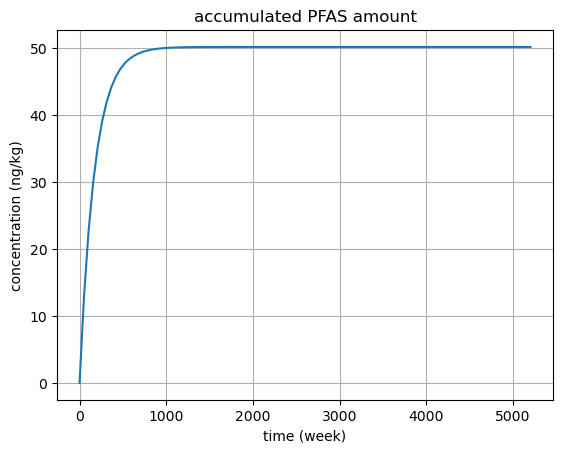

In [45]:
import math
import matplotlib.pyplot as plt

def calculate_accumulated_amount_with_weekly_addition(half_life, initial_concentration, weekly_addition, time_elapsed_weeks):
    """
    매주 일정량이 추가되는 경우의 체내 축적량 계산

    Args:
        half_life: 반감기 (년)
        initial_concentration: 초기 농도
        weekly_addition: 매주 추가되는 양 (ng/kg/week)
        time_elapsed_weeks: 경과 시간 (주)

    Returns:
        총 축적량
    """

    decay_constant = math.log(2) / (half_life * 52)  # 반감기를 주 단위로 변환
    total_accumulation = 0

    for week in range(1, time_elapsed_weeks + 1):
        # 이전 주의 축적량에 대한 감쇠
        previous_accumulation = total_accumulation * math.exp(-decay_constant)
        # 이번 주 추가되는 양
        new_addition = weekly_addition
        # 총 축적량 업데이트
        total_accumulation = previous_accumulation + new_addition

    return total_accumulation

# 입력 값 설정
half_life = 2.3  # 년
initial_concentration = 0
weekly_addition = 0.29  # ng/kg/week
time_elapsed_weeks = 100 * 52  # 100년을 주 단위로 변환

# 함수 호출 및 결과 출력
result = calculate_accumulated_amount_with_weekly_addition(half_life, initial_concentration, weekly_addition, time_elapsed_weeks)
print("체내 축적량:", result, "ng/kg")



# 다양한 시간에 대한 축적량 계산
time_elapsed_weeks_list = range(0, 100 * 52 + 1, 52)  # 1년 단위로 계산
accumulated_amounts = []
for time in time_elapsed_weeks_list:
    accumulated_amounts.append(calculate_accumulated_amount_with_weekly_addition(half_life, initial_concentration, weekly_addition, time))

# 그래프 그리기
plt.plot(time_elapsed_weeks_list, accumulated_amounts)
plt.xlabel('time (week)')
plt.ylabel('concentration (ng/kg)')
plt.title('accumulated PFAS amount')
plt.grid(True)
plt.show()

       age  노출량(week)        HI
0   7-12yr  10.354050  0.517703
1    19yr+   4.844020  0.242201
2    19yr+   6.426631  0.321332
3  13-18yr   1.274506  0.063725
4    3-6yr  10.483151  0.524158


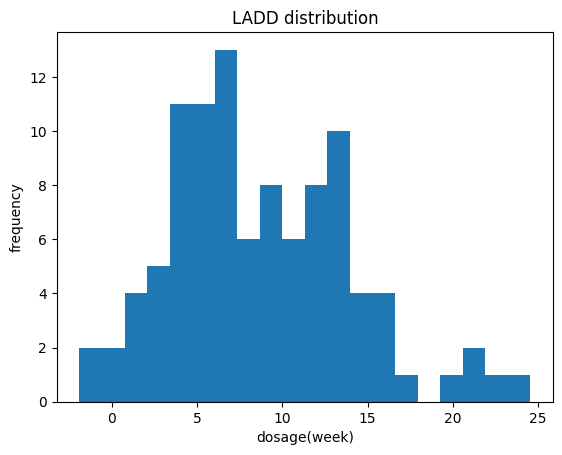

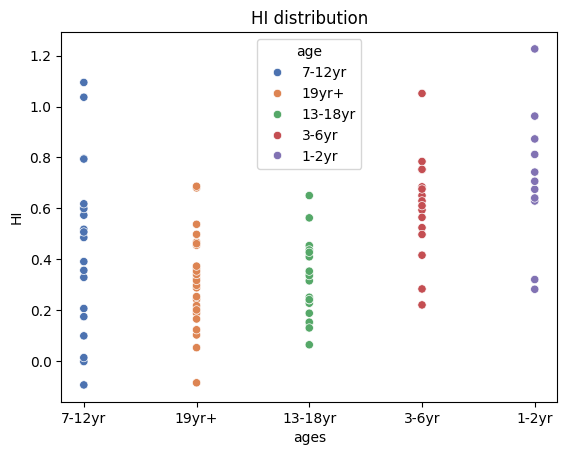

,age,노출량(week),HI
0,7-12yr,10.354050,0.517703
1,19yr+,4.844020,0.242201
2,19yr+,6.426631,0.321332
3,13-18yr,1.274506,0.063725
4,3-6yr,10.483151,0.524158
...,...,...,...
95,13-18yr,4.823260,0.241163
96,13-18yr,7.060492,0.353025
97,7-12yr,12.359664,0.617983
98,1-2yr,12.816260,0.640813


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# 나이대별 비율 (예시)
age_groups = ['1-2yr', '3-6yr', '7-12yr', '13-18yr', '19yr+']
age_probs = [0.1, 0.15, 0.2, 0.25, 0.3]  # 실제 데이터 비율에 맞게 수정

# 시나리오 활용 총 노출량 데이터 사용 
exposure_data = {
    '나이대': age_groups,
    '평균': [1.619, 1.635, 1.381, 1.042, 0.865],
    '극단값(95%)': [3.120, 2.861, 3.591, 1.89, 1.999]
}
df_exposure = pd.DataFrame(exposure_data)

# 100명의 나이 랜덤 생성
np.random.seed(42)  # 재현성을 위한 seed 설정
ages = np.random.choice(age_groups, size=100, p=age_probs)

# 나이대별 노출량 할당
exposures = []
for age in ages:
    mean = df_exposure[df_exposure['나이대'] == age]['평균'].values[0]
    std = (df_exposure[df_exposure['나이대'] == age]['극단값(95%)'].values[0] - mean) / 1.96  # 95% 신뢰구간에서 표준편차 추정
    exposure = np.random.normal(loc=mean, scale=std)
    exposures.append(exposure*7)

# 데이터프레임 생성
df = pd.DataFrame({'age': ages, '노출량(week)': exposures})

# 위해지수 계산을 위한 주간섭취 한계량
PFOA_TWI = 20 #kg/kg bw/week

df['HI'] = df['노출량(week)']/PFOA_TWI
df

# 데이터 확인
print(df.head())

# 히스토그램 시각화 (선택 사항)
plt.hist(df['노출량(week)'], bins=20)
plt.xlabel('dosage(week)')
plt.ylabel('frequency')
plt.title('LADD distribution')
plt.show()

sns.scatterplot(data=df, x='age', y='HI', hue='age', palette='deep')

# 그래프 제목 설정
plt.title('HI distribution')

# x축 레이블 설정
plt.xlabel('ages')

# y축 레이블 설정
plt.ylabel('HI')

plt.show()

df